# Αναγνώριση Προτύπων - Μηχανική Μάθηση - Εργασία 2
---
Εισάγουμε τις κατάλληλλες βιβλιοθήκες

In [1]:
# Operating System Library
import os

# Numpy library
import numpy as np

# Python Image Library
from PIL import Image

# Matplotlib library
import matplotlib.pyplot as plt

# MNIST dataset from keras
from keras.datasets import mnist

""" Scikit Learn Tools """

# PCA from decomposition package
from sklearn.decomposition import PCA

# KNeighbors Classifier from neighbors package
from sklearn.neighbors import KNeighborsClassifier

# F1 score from metrics package
from sklearn.metrics import f1_score

# StandardScaler and MinMaxScaler from preprocessing package
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# SVC from SVM package
from sklearn.svm import SVC

# Grid Search from model selection package
from sklearn.model_selection import GridSearchCV


Kάνουμε unzip faces.zip (Δεν χρειάζεται άμα εκτελεστεί σε VS Code)


In [ ]:
!unzip faces.zip


## Ερώτημα 1: Αναγνώριση Προσώπων (Face recognition)
---
Σε αυτό τo ερώτημα θα εφαρμόσετε τη μέθοδο Eigenfaces (δηλαδή συνδυασμό PCA για
εξαγωγή χαρακτηριστικών και ταξινομητή πλησιέστερου γείτονα για την αναγνώριση
προσώπων). Θα χρησιμοποιήσετε εικόνες προσώπων από τη βάση δεδομένων προσώπων
Yale B στην οποία υπάρχουν 10 πρόσωπα που φωτογραφήθηκαν κάτω από 64 διαφορετικές
συνθήκες φωτισμού. Χρησιμοποιώντας την υλοποίησή σας, θα αξιολογήσετε την ικανότητα
του αλγορίθμου Eigenfaces να χειρίζεται συνθήκες φωτισμού των εικόνων ελέγχου (test set)
οι οποίες διαφέρουν από αυτές στις εικόνες εκπαίδευσης (training set).

Η μέθοδος Eigenfaces για την αναγνώριση προσώπων περιλαμβάνει 3 βασικά βήματα:

- Βήμα 1: Κάθε εικόνα διάστασης 50 x 50 pixels του συνόλου εκπαίδευσης μετατρέπεται σε
διάνυσμα διάστασης 2500 στοιχείων και αποθηκεύεται ως στήλη στον πίνακα δεδομένων
εκπαίδευσης Χ. Στη συνέχεια εφαρμόζουμε principal component analysis (PCA) στον πίνακα
δεδομένων εκπαίδευσης και εξάγουμε τις d κύριες συνιστώσες (principal components). Τα d
ιδιοδιανύσματα (eigenvectors) όταν μετατραπούν και απεικονιστούν ως εικόνες
ονομάζονται Eigenfaces.
- Βήμα 2: Προβάλουμε τις εικόνες των συνόλων εκπαίδευσης και ελέγχου στο χώρο d
διαστάσεων και με αυτόν το τρόπο εξάγουμε χαρακτηριστικά χαμηλής διάστασης (ddimensional features). Ο χώρος χαμηλής διάστασης d ονομάζεται ιδιοχώρος (eigenspace).
- Βήμα 3: H αναγνώριση των προσώπων γίνεται στον eigenspace χρησιμοποιώντας
ταξινομητή (ενός) πλησιέστερου γείτονα με Ευκλείδεια απόσταση ως μετρική.

### Ζητούμενο I
---
Να γράψετε μία συνάρτηση loadImages(path, set_number) η οποία παίρνει ως είσοδο το
path στο οποίο βρίσκεται ο φάκελος των εικόνων π.χ. loadImages(“C:/images”, “Set_1”),
διαβάζει τις εικόνες και επιστέφει έναν πίνακα δεδομένων ανάλογα με το set_number,
όπου κάθε εικόνα αναπαρίσταται ως διάνυσμα στήλη. Η συνάρτηση επιστέφει επίσης τις
κατηγορίες (labels) στις οποίες ανήκουν οι διαφορετικές εικόνες κωδικοποιημένες με
ακεραίους (π.χ. 0 για φωτογραφίες που ανήκουν στο person_0, 1 για τις φωτογραφίες
που ανήκουν στο person_1 κτλ).

Από το σύνολο δεδομένων προσώπων Yale B θα χρησιμοποιήσετε τα παρακάτω υποσύνολα:
- Set_1: person*_01.png έως person*_07.png (δηλαδή τις 7 πρώτες εικόνες κάθε προσώπου)
- Set_2: person*_08.png έως person*_19.png
- Set_3: person*_20.png έως person*_31.png
- Set_4: person*_32.png εως person*_45.png
- Set_5: person*_46.png έως person*_64.png

In [55]:
'''
function that checks if an image belongs in a set
- returns: True if the image belongs in a set, False otherwise
'''
def is_in_set(min_value, max_value, name):

    # extract the image value from the name
    value = int(name[9:11])

    # checking if the image belongs in the set 
    if (value >= min_value) & (value <= max_value):
        return True
    else:
        return False

'''
loads a given set of images from a given directory and returns the images as vector-columns in a tuple with the labels
'''
def load_images(path, set_number):

    # checking if path exists
    if not os.path.exists(path):
        print("Error path: " + path + " not found")
        return
    
    # initializing the variables
    min_value=-1
    max_value=-1

    # determining which set of images we want to load
    if set_number == "Set_1":
        min_value = 1
        max_value = 7
    elif set_number == "Set_2":
        min_value = 8
        max_value = 19
    elif set_number == "Set_3":
        min_value = 20
        max_value = 31
    elif set_number == "Set_4":
        min_value = 32
        max_value = 45
    elif set_number == "Set_5":
        min_value = 46
        max_value = 64

    # Get the list of all image file names in the folder
    file_names = [f for f in os.listdir(path) if is_in_set(min_value, max_value, f)]

    # Load the images and store them in a numpy array where each image is a column
    image_matrix = np.zeros((50 * 50, len(file_names)))

    # initialize the labels row for the images in the set
    labels = []

    for i, file_name in enumerate(file_names):

        # Adding the current image's label to the labels row
        labels.append(int(file_name[6:8]))

        # Open the image file using PIL
        image = Image.open(os.path.join(path, file_name))
        
        # Convert the image to a numpy array and flatten it
        image_array = np.array(image).flatten()
        
        # Store the image in the numpy matrix
        image_matrix[:, i] = image_array
    
    # return the matrix and the labels as a tuple
    return (image_matrix, labels)
    

# Storing all the image matrices from the path
image_tuple_set_1 = load_images("faces", "Set_1")
image_tuple_set_2 = load_images("faces", "Set_2")
image_tuple_set_3 = load_images("faces", "Set_3")
image_tuple_set_4 = load_images("faces", "Set_4")
image_tuple_set_5 = load_images("faces", "Set_5")

### Ζητούμενο II 
---
Να εκπαιδεύσετε την μέθοδο Eigenfaces με d = 9 και d = 30 χρησιμοποιώντας όλες τις
εικόνες στο Set_1 (70 εικόνες) και να αναγνωρίσετε τα πρόσωπα στα Set_1 έως Set_5.
Για κάθε Set και κάθε τιμή της διάστασης d να αναφέρετε την ακρίβεια ταξινόμησης. Για
το Set_1 αναμένουμε 100% ακρίβεια ταξινόμησης καθώς χρησιμοποιήθηκε για την
εκπαίδευση της μεθόδου Eigenfaces. Σχολιάστε την δυνατότητα γενίκευσης της μεθόδου
στα διαφορετικά Sets.

Αρχικά πρέπει να χωρίσουμε τα data σε train data και test data

In [56]:
'''
    The train data is set_1 and the rest is test data
'''

# the matrix is the data
X_train = image_tuple_set_1[0]

X_tests = [image_tuple_set_2[0], image_tuple_set_3[0], image_tuple_set_4[0], image_tuple_set_5[0]]

# the labels are the target
Y_train = image_tuple_set_1[1]

Y_tests = [image_tuple_set_2[1], image_tuple_set_3[1], image_tuple_set_4[1], image_tuple_set_5[1]]

Έπειτα θα τυποποιήσουμε τα δεδομένα χρησιμοποιώντας την StandardScaler βιβλιοθηκη.

In [57]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
# We need to transpose the matrices before applying PCA transformation because we need to compress the columns of the matrices
X_train_std = scaler.fit_transform(X_train.transpose())

X_tests_std = []

for X_test in X_tests:
  # We need to transpose the matrices before applying PCA transformation because we need to compress the columns of the matrices
  X_test_std = scaler.fit_transform(X_test.transpose())
  X_tests_std.append(X_test_std)


Έπειτα θα κάνουμε Principal Component Analysis για τα data με d=9 και d=30

In [58]:
'''
    function that returns the train and test data in a tuple after applying PCA transformation to them in a d number of components
'''
def pca_data(d, X_train, X_tests):

    # Initialize the PCA classifier
    pca = PCA(n_components=d, whiten=True)

    # PCA transformation for training data 
    X_train_pca = pca.fit_transform(X_train)

    # PCA transformation for all test data
    X_tests_pca = []
    for X_test in X_tests:
        X_test_pca = pca.transform(X_test)
        X_tests_pca.append(X_test_pca)
    
    # We will keep the matrices transposed for training and testing
    return (X_train_pca, X_tests_pca)

# function calls
image_PCA_tuple_9 = pca_data(9, X_train_std, X_tests_std)
image_PCA_tuple_30 = pca_data(30, X_train_std, X_tests_std)

# Assign the data accordingly
X_train_pca_9 = image_PCA_tuple_9[0]
X_train_pca_30 = image_PCA_tuple_30[0]
X_tests_pca_9 = image_PCA_tuple_9[1]
X_tests_pca_30 = image_PCA_tuple_30[1]

Θα κάνουμε train τα data για d=9 και d=30 με την χρήση του K nearest neighbors

In [59]:
'''
    function that trains and tests pca compressed images using k nearest neighbors
    calculates the accuracy of the train model 
'''
def knn_train_test_images(X_train_pca, Y_train, X_tests_pca, Y_tests):

    # Create a KNN object with the specified number of neighbors
    knn = KNeighborsClassifier(n_neighbors=1)

    # Fit the model using the training data
    knn.fit(X_train_pca, Y_train)

    y_preds = []

    for X_test_pca in X_tests_pca:

        # Predict the labels for the testing data
        y_pred = knn.predict(X_test_pca)

        y_preds.append(y_pred)

    # compute the accuracy of the train model
    accuracy = f1_score(Y_train, Y_train, average="weighted")
    print("Set 1 accuracy: ", accuracy)
    
    # testing the accuracy of each set
    for i in range(len(y_preds)):
        y_pred = y_preds[i]
        Y_test = Y_tests[i]

        accuracy = f1_score(Y_test, y_pred, average="weighted")
        print("Set", i+2, "accuracy: ", accuracy)


# function calls
print("for d = 9")
knn_train_test_images(X_train_pca_9, Y_train, X_tests_pca_9, Y_tests)
print("for d = 30")
knn_train_test_images(X_train_pca_30, Y_train, X_tests_pca_30, Y_tests)

for d = 9
Set 1 accuracy:  1.0
Set 2 accuracy:  0.9669163879598663
Set 3 accuracy:  0.8346369560786734
Set 4 accuracy:  0.42512249820598963
Set 5 accuracy:  0.2357639417877847
for d = 30
Set 1 accuracy:  1.0
Set 2 accuracy:  0.9836120401337793
Set 3 accuracy:  0.9916521739130436
Set 4 accuracy:  0.8431796536796538
Set 5 accuracy:  0.5268649112562157


Η μέθοδος Eigenfaces μπορεί να γενικευθεί όταν πριν την τυποποίηση των δεδομένων χρησιμοποιηθούν οι ανάστροφοι πίνακες δεδομένων έτσι ώστε οι επεξεργασίες και οι συμπιέσεις δεν θα εξαρτώνται από τον αριθμό των εικόνων ανά σύνολο εικόνων. 

### Ζητούμενο ΙΙΙ
---
Να απεικονίσετε (σε μορφή εικόνας) τα 9 κύρια ιδιοδιανύσματα (9 top eigenvectors) που
προέκυψαν αφού εκπαιδεύσατε την μέθοδο Eigenfaces στο Set_1. Τι παρατηρείτε; Τι θα
μπορούσαμε να πούμε ότι εκφράζουν τα διαφορετικά ιδιοδιανύσματα;

Αρχικά κάνουμε PCA με d = 30 συνιστώσες στα αρχικά δεδομένα ως προς τα features $(X^T)$. Θα αναπαραστήσουμε γραφικά την σχέση των κύριων συνιστώσεων με τη διακύμανση και την συσσωρευτική διακύμανση των δεδομένων. Να σημειώσουμε ότι οι 9 κυριότερες συνιστώσες από το PCA είναι τα 9 κύρια ιδιοδιανύσματα των δεδομένων. 

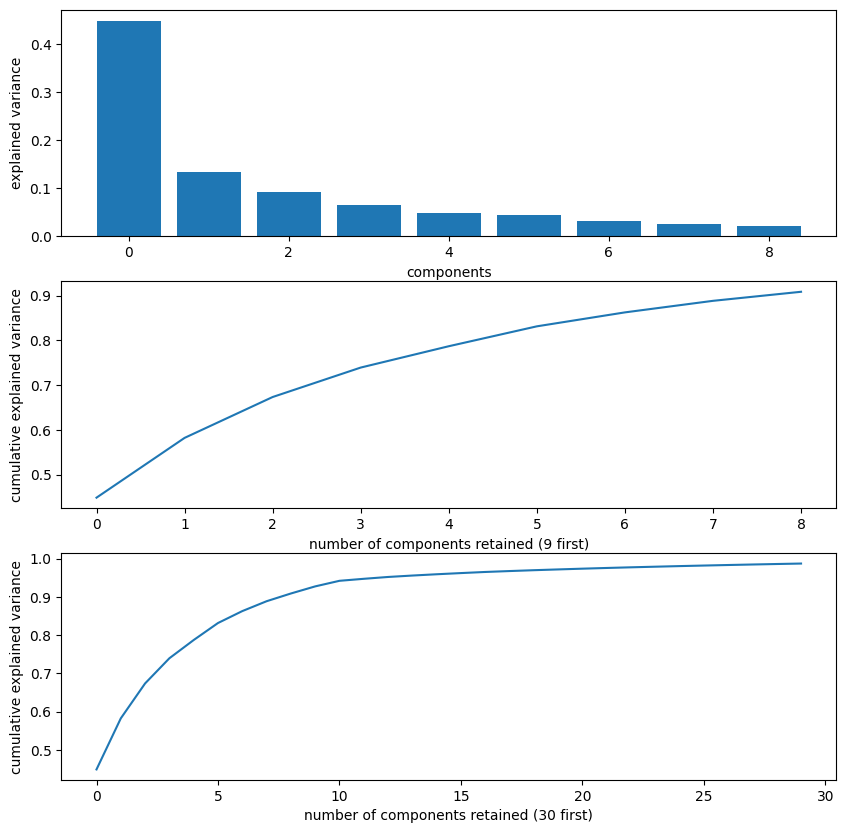

In [60]:
# Compute PCA with 30 components that will be used later
n_components = 30 
pca = PCA(n_components=n_components, whiten=True).fit(X_train.transpose())

# Compute the cumulative variance explained by the principal components
cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

# Plotting the variance explained by the top 9 eigenvectors
plt.figure(figsize=(10, 10))
numOfComp=9
plt.subplot(3, 1, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel('components')
plt.ylabel('explained variance')

# Plotting the cumulative variance explained by the top 9 eigenvectors
plt.subplot(3, 1, 2)
plt.plot(cumExplainedVar[:9])
plt.xlabel('number of components retained (9 first)')
plt.ylabel('cumulative explained variance')

# Plotting the cumulative variance explained by all 30 eigenvectors
plt.subplot(3, 1, 3)
plt.plot(cumExplainedVar[:30])
plt.xlabel('number of components retained (30 first)')
plt.ylabel('cumulative explained variance')

plt.show()



Τα 9 κύρια ιδιοδιανύσματα εξηγούν περίπου το 90% της διακύμνασης των δεδομένων. Παρατηρούμε ότι για παραπάνω από 9 συνιστώσεις είναι πολύ πιθανό να έχουμε φαινόμενα overfitting. Επιπλεόν, θα χρησιμοποιήσουμε τις παρακάτω παραστάσεις για τον σχολιασμό των αποτελεσμάτων και του επόμενου ερωτήματος.

Ακολουθεί η οπτικοποίηση των παραπάνω συνιστωσών από τις εικόνες. Παρατηρούμε την πληροφορία της εικόνας που εμπεριέχεται σε κάθε συνιστώσα. Η πρώτη φαίνεται να έχει πληροφορίες για τα χαρακτηριστικά του προσώπου, οι επόμενες 2 φαίνεται να έχουν πληροφορίες για το φωτισμό και τις γωνίες φωτισμού. Η επόμενη έχει πληροφορίες για σχήματα φρυδιών και γενειάδας κ.ο.κ.

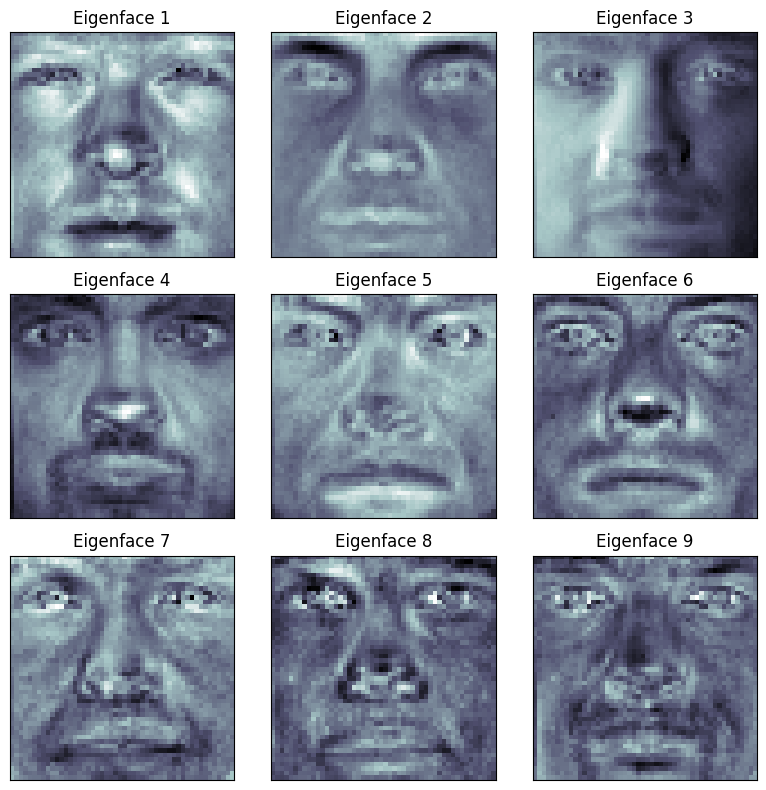

In [61]:
# Plotting the eigenfaces of the training data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(pca.components_[i].reshape(50, 50), cmap="bone")
  ax.set_title("Eigenface {}".format(i+1))

plt.tight_layout()
plt.show()

# Storing the eigenvectors for later use
eigenvectors = pca.components_

### Ζήτουμενο IV
---
Να χρησιμοποιήσετε d = 9 και d = 30 Eigenfaces που βρήκατε από το Set_1, για να
ανακατασκευάσετε μια τυχαία εικόνα από κάθε ένα από τα 5 Sets. Να απεικονίσετε τόσο
τις αρχικές εικόνες όσο και τις ανακατασκευασμένες της για διαφορετικές τιμές του d.
Να σχολιάσετε την ποιότητα ανακατασκευής κάθε εικόνας.



Αρχικά πρέπει να διαλέξουμε μια τυχαία εικόνα από κάθε Set.

In [62]:
# Retrieving the Sets and Storing them in a list
set_1 = X_train
set_2 = X_tests[0]
set_3 = X_tests[1]
set_4 = X_tests[2]
set_5 = X_tests[3]
sets = [set_1, set_2, set_3, set_4, set_5]

image_indexes = []
images = []

# Retrieving a random image from each set and depicting it
for set in sets:
    
    # Select a random image index
    image_index = np.random.choice(set.shape[1])

    # Store the index for later use
    image_indexes.append(image_index)

    # Select the image from the matrix
    image = set[:, image_index]

    # Reshape the image
    image = image.reshape((50, 50))

    # Store the image for later use
    images.append(image)

Θα δημιουργήσουμε την συνάρτηση της ανακατασκευής μιας εικόνας 

In [63]:
def reconstruct_image(image_pca, eigenvectors, d):

    # We will use the d top eigenvectors only
    top_eigenvectors = eigenvectors[:d, :]

    # Reconstruct the image using the feature vector and top eigenvectors
    image_reconstructed = np.dot(top_eigenvectors.transpose(), image_pca)

    # Destandardize the image
    image_reconstructed = image_reconstructed * image_reconstructed.std() + image_reconstructed.mean() 

    return image_reconstructed.reshape((50,50))


Θα ανακατασκευάσουμε τις εικόνες για d = 9

In [64]:
# Retrieving the PCA Sets and Storing them in a list
set_1_pca_9 = X_train_pca_9
set_2_pca_9 = X_tests_pca_9[0]
set_3_pca_9 = X_tests_pca_9[1]
set_4_pca_9 = X_tests_pca_9[2]
set_5_pca_9 = X_tests_pca_9[3]
sets_pca_9 = [set_1_pca_9, set_2_pca_9, set_3_pca_9, set_4_pca_9, set_5_pca_9]

reconstruct_images_9 = []

for i in range(len(sets_pca_9)):
    
    # Selecting the row the image we selected should be in the PCA matrix 
    image_pca = sets_pca_9[i][image_indexes[i], :]

    # Reconstructing the image
    reconstructed_image = reconstruct_image(image_pca, eigenvectors, 9)

    # Storing the reconstructed image for later use
    reconstruct_images_9.append(reconstructed_image)

Θα ανακατασκευάσουμε τις εικόνες για d = 30

In [65]:
# Retrieving the PCA Sets and Storing them in a list
set_1_pca_30 = X_train_pca_30
set_2_pca_30 = X_tests_pca_30[0]
set_3_pca_30 = X_tests_pca_30[1]
set_4_pca_30 = X_tests_pca_30[2]
set_5_pca_30 = X_tests_pca_30[3]
sets_pca_30 = [set_1_pca_30, set_2_pca_30, set_3_pca_30, set_4_pca_30, set_5_pca_30]

reconstruct_images_30 = []

for i in range(len(sets_pca_30)):
    
    # Selecting the row the image we selected should be in the PCA matrix 
    image_pca = sets_pca_30[i][image_indexes[i], :]
    
    # Reconstructing the image
    reconstructed_image = reconstruct_image(image_pca, eigenvectors, 30)

    # Storing the reconstructed image for later use
    reconstruct_images_30.append(reconstructed_image)

Αναπαριστούμε τις εικόνες που διαλέξαμε και τις εικόνες που φτιάξαμε

Original Images


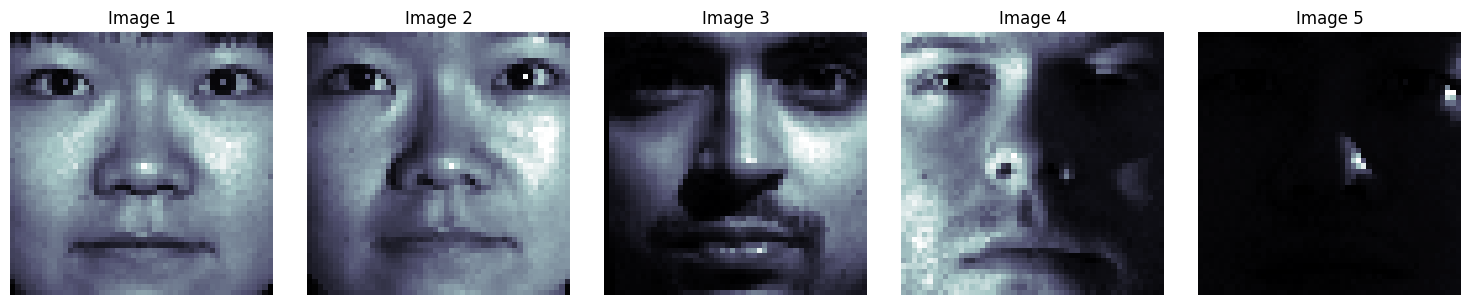

Reconstructed Images when d = 9


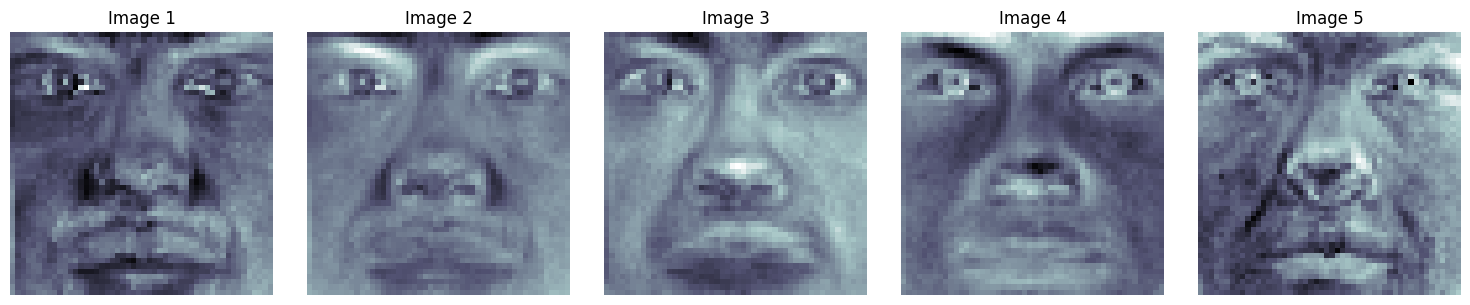

Reconstructed Images when d = 30


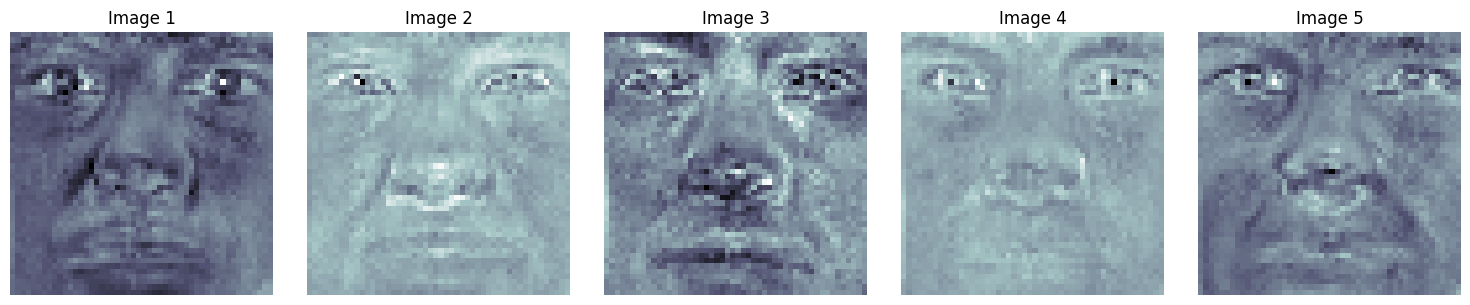

In [66]:
'''
    Function that plots a list of images
'''
def plot_images(images):
    # Create a figure with 1 row and 5 columns
    fig, axes = plt.subplots(1, len(images), figsize=(15, 3))

    # Iterate over the column indices and plot each image
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap="bone")
        axes[i].set_title("Image {}".format(i+1))
        axes[i].axis("off")

    # Show the figure
    plt.tight_layout()
    plt.show()

print("Original Images")
plot_images(images)
print("Reconstructed Images when d = 9")
plot_images(reconstruct_images_9)
print("Reconstructed Images when d = 30")
plot_images(reconstruct_images_30)

Παρατηρούμε ότι με d=30 η ανακατασκευή είναι λιγότερο ακριβής από ότι με d=9. Αυτό συμβαίνει επείδη όταν d>9, ξεκινάει να υπάρχει πρόβλημα overfitting όπου αφομοιώνονται τα training data υπερβολικά πολύ και το μοντέλο δεν αποδίδει τόσο καλά σε καινούργια δεδομένα. Τα διαγράμματα από το προηγούμενο ερώτημα αναλύουν περισσότερο το συμπέρασμα στο οποίο κατέληξα με αυτά τα αποτελέσματα. 

### Ζητούμενο V
---
Να απεικονίσετε τα 9 κύρια singular vectors που προκύπτουν αφού εφαρμόσετε SVD
στον πίνακα δεδομένων του Set_1. Διαφέρουν τα singular vectors από τα αντίστοιχα
ιδιοδιανύσματα; Αν ναι, γιατί;

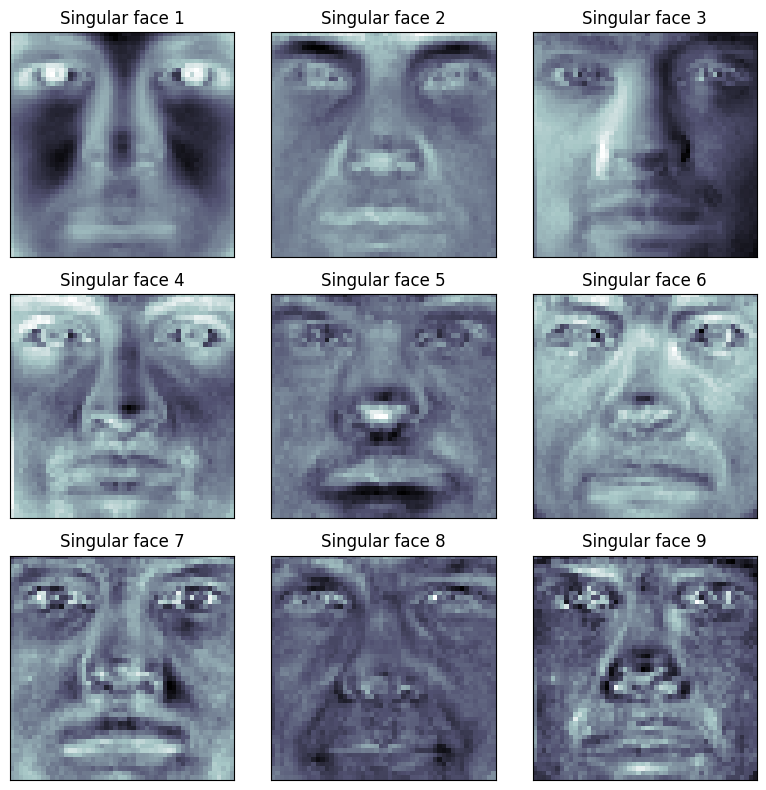

In [67]:
# compute the singular value decomposition of training data
U, S, Vt = np.linalg.svd(X_train.transpose())

# extract the top 9 singular vectors
top_singular_vectors = Vt[:9, :]

# Reshape the singular_vectors to 50x50 images
singular_images = top_singular_vectors

# Plot the eigenimages
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(singular_images[i].reshape((50, 50)), cmap="bone")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Singular face {}".format(i+1))

plt.tight_layout()
plt.show()

Παρατηρούμε ότι η SVD έβγαλε πιο αποτελεσματικά "Eigenfaces" από τα ιδιοδιανύσματα του πίνακα συνδιακύμανσης των δεδομένων. Αυτό συνέβη διότι η SVD μέθοδος είναι πιο αποτελεσματική αριθμητικά σταθερή για μεγάλα σύνολα δεδομένων αλλά και μπορεί να χρησιμοποιηθεί σε μη τετραγωνικούς πίνακες.

## Ερώτημα 2: Ταξινόμηση εικόνων χρησιμοποιώντας SVMs
---
Σε αυτό το ερώτημα, καλείστε να διερευνήσετε την επίδοση των support vector machines
στο πρόβλημα της αναγνώρισης χειρόγραφων ψηφίων. Για το σκοπό αυτό θα
χρησιμοποιήσετε το σύνολο δεδομένων MNIST και υλοποιήσεις αλγορίθμων της
βιβλιοθήκης scikit-learn. Το σύνολο δεδομένων MNIST αποτελείται από 70000 εικόνες
χειρόγραφων ψηφίων και, τυπικά, χωρίζεται σε τρία υποσύνολα: training set (50000
εικόνες), validation set (10000 εικόνες), test set (10000 εικόνες). Κάθε εικόνα έχει διάσταση
28 x 28 pixels και απεικονίζει ένα χειρόγραφο ψηφίο.

Ζητείται να φορτώσετε τα δεδομένα του συνόλου MNIST και να μετατρέψετε κάθε
εικόνα σε μορφή διανύσματος διάστασης 28 x 28 = 784.

In [68]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images to 1D array
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

Στη συνέχεια κανονικοποιήστε (normalize) τα δεδομένα στο διάστημα [0,1]. Θα χρησιμοποιήσουμε την MinMaxScaler μέθοδο από την Scikit-Learn.

In [69]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.fit_transform(X_test)

Στα SVMs υπάρχουν διάφορες επιλογές που μπορεί να επηρεάσουν την απόδοση
τους σε προβλήματα ταξινόμησης. Παραδείγματα τέτοιων επιλογών αποτελούν ο
τύπος του πυρήνα (kernel) και οι τιμές των διάφορων (υπερ)παραμέτρων. Ζητείται
να εξετάσετε την επίδοση των SVMs για γραμμικό (linear SVMs) και RBF πυρήνα και
διαφορετικές τιμές παραμέτρων ώστε να καθορίσετε το συνδυασμό
παραμέτρων/πυρήνων που οδηγούν στη μεγαλύτερη ακρίβεια ταξινόμησης. Για
αυτό το πείραμα να χρησιμοποιήσετε 60000 εικόνες για εκπαίδευση (training) και
10000 παραδείγματα για δοκιμές (test). Να αναφέρετε τις τιμές των παραμέτρων,
δηλαδή τύπο πυρήνα, τιμές των C και gamma που οδηγούν στις καλύτερες επιδόσεις
τόσο στο σύνολο εκπαίδευσης όσο και στο σύνολο δοκιμής (test set)

In [ ]:
svm = SVC(kernel='rbf')
param_grid = {'C': [1.0, 2.0, 4.0], 'gamma': [0.001, 0.1, 0.1]}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Εδώ είναι η συνάρτηση που εκπαιδεύει τα δεδομένα και εμφανίζει τα score λαμβάνοντας υπόψη τις 3 παραμέτρους που ζητούνται. Οι επιδόσεις θα εκτιμηθούν με βάση την μέση ακρίβεια (mean accuracy) που υπολογίζεται από την svm.score() μέθοδο διότι το MNIST dataset είναι ισορροπημένο dataset με ίσο αριθμό εικόνων για κάθε ψηφίο (0 - 9)

In [70]:
'''
    Function that trains and tests a given set of data (X_train, y_train)-(X_test, y_test) using SVM 
    SVM is being affected by the kernel, C and gamma parameters given
    Prints the accuracy of both the training and test data 
'''
def svm_train(X_train, y_train, X_test, y_test, svm_kernel, svm_c, svm_gamma):
    
    # Create an instance of SVM classifier
    svm = SVC(kernel=svm_kernel, C=svm_c, gamma=svm_gamma)

    # Train the SVM classifier on the training set
    svm.fit(X_train, y_train)

    # Calculate and print the mean accuracy of the training data
    train_accuracy = svm.score(X_train, y_train)
    print('accuracy of training data:', train_accuracy)

    # Calculate and print the mean accuracy of the test data
    test_accuracy = svm.score(X_test, y_test)
    print('accuracy of test data:', test_accuracy)

Για αρχή, θα ελέγξουμε τι επιδόσεις για τις διαφορετικές τιμές του kernel. Ζητείται να εξετάσουμε τις επιδόσεις μόνο για τις τιμές 'linear' και 'rbf'. Εδώ θα εξετάσουμε τις επιδόσεις για kernel = 'linear'. Η παράμετρος gamma δεν επηρεάζει τις επιδόσεις του SVM όταν kernel = 'linear'. Στις άλλες δύο υπερπαραμέτρους κρατάμε τις default τιμές (C = 1.0, gamma = 'scale')

In [71]:
print("SVM testing with kernel = \'linear\', C = 1.0, gamma = \'scale\'")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'linear', 1.0, 'scale')

SVM testing with kernel = 'linear', C = 1.0, gamma = 'scale'
accuracy of training data: 0.97085
accuracy of test data: 0.9403


Τώρα θα ελέγξουμε τις επιδόσεις όταν η τιμή kernel έιναι ίση με rbf.

In [72]:
print("SVM testing with kernel = \'rbf\', C = 1.0, gamma = \'scale\'")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 1.0, 'scale')

SVM testing with kernel = 'rbf', C = 1.0, gamma = 'scale'
accuracy of training data: 0.9899166666666667
accuracy of test data: 0.9793


Παρατηρούμε ότι όταν η τιμή του kernel έιναι 'rbf' τότε υπάρχει μεγαλύτερη ακρίβεια τόσο στα δεδομένα εκπαίδευσης όσο και στα δεδομένα ελέγχου. Τώρα θα ελέγξουμε την υπερπαράμετρο gamma και την ιδανική της τιμή. Εφόσον η τιμή του kernel θα παραμείνει στο 'rbf', το gamma θα επηρεάσει την αποδοτικότητα του μοντέλου.

Ξεκινάμε ορίζοντας στο gamma την τιμή 0.1.

In [73]:
print("SVM testing with kernel = \'rbf\', C = 1.0, gamma = 0.1")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 1.0, 0.1)

SVM testing with kernel = 'rbf', C = 1.0, gamma = 0.1
accuracy of training data: 0.9999166666666667
accuracy of test data: 0.955


Παρατηρούμε ότι έχει πολύ καλή επίδοση στην αναγνώριση των training data αλλά υστερεί στην αναγνώριση των test data σε σύγκριση με όταν η παράμετρος gamma είναι στην scale τιμή (overfitting). Ας δούμε πόση είναι η scale τιμή για τα δεδομένα μας. Η scale τιμή του gamma υπολογίζεται από τον τύπο:
$$
    scale = \frac{1}{features*σ}
$$ 
Όπου features ο αριθμός των χαρακτηριστικών και σ η τυπική απόκλιση των δεδομένων εκπαίδευσης σε αυτή την περίπτωση.

In [74]:
scale = 1/(28*28*X_train_normalized.std())
print(scale)

0.0041397749586729845


Εφόσον έχουμε overfitting για gamma=0.1 πρέπει να χαμηλώσουμε το gamma. Ας δοκιμάσουμε με gamma=0.01.

In [75]:
print("SVM testing with kernel = \'rbf\', C = 1.0, gamma = 0.01")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 1.0, 0.01)

SVM testing with kernel = 'rbf', C = 1.0, gamma = 0.01
accuracy of training data: 0.98545
accuracy of test data: 0.9769


Παρατηρούμε ότι με gamma=0.01 έχουμε underfitting. Μήπως μπορούμε καλύτερα; Μπορούμε να δοκιμάσουμε όταν το gamma είναι 0.05?

In [76]:
print("SVM testing with kernel = \'rbf\', C = 1.0, gamma = 0.05")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 1.0, 0.05)

SVM testing with kernel = 'rbf', C = 1.0, gamma = 0.05
accuracy of training data: 0.9992166666666666
accuracy of test data: 0.9827


Παρατηρούμε ότι για gamma = 0.05 μεγαλώνει η ακρίβεια για τα test data και για τα training data. Μπορούμε να συμπεράνουμε ότι η καλύτερη τιμή για την παράμετρο gamma είναι κοντά στο 0.05 ως προς τα αποτελέσματα. Συμπεραίνουμε επίσης ότι όσο αυξάνουμε το gamma τόσο αυξάνουμε τόσο μεγαλύτερο κόστος χρόνου έχουμε.

Τώρα που εξετάσαμε τις παραμέτρους kernel και gamma πρέπει να εξετάσουμε την παράμετρο C. Αρχικά ήταν στο 1.0. Θέλουμε να ανεβάσουμε το test data accuracy. Άρα θα πάμε το C στο 0.5.

In [77]:
print("SVM testing with kernel = \'rbf\', C = 0.5, gamma = 0.05")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 0.5, 0.05)

SVM testing with kernel = 'rbf', C = 0.5, gamma = 0.05
accuracy of training data: 0.9953166666666666
accuracy of test data: 0.9796


Μειώθηκαν οι επιδόσεις και των δεδομένων εκπαίδευσης και των δεδομένων ελέγχου οπότε πρέπει να αυξήσουμε το C. Ας δούμε τι θα γίνει με C=2.

In [78]:
print("SVM testing with kernel = \'rbf\', C = 2.0, gamma = 0.05")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 2.0, 0.05)

SVM testing with kernel = 'rbf', C = 2.0, gamma = 0.05
accuracy of training data: 0.9999
accuracy of test data: 0.9834


Αυξήθηκαν οι επιδόσεις και των δεδομένων εκπαίδευσης και των δεδομένων ελέγχου. Ας δούμε τι θα γίνει με C=4 μήπως έχουμε ακόμα καλύτερες επιδόσεις.

In [79]:
print("SVM testing with kernel = \'rbf\', C = 4.0, gamma = 0.05")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 4.0, 0.05)

SVM testing with kernel = 'rbf', C = 4.0, gamma = 0.05
accuracy of training data: 1.0
accuracy of test data: 0.9836


Παρατηρούμε ότι στα δεδομένα εκπαίδευσης έχει τέλεια ακρίβεια ενώ στα δεδομένα ελέγχου η απόδοση είναι πιο ψηλά από ποτέ. Δοκιμάζουμε με C=6 και βλέπουμε ότι οι αποδόσεις παραμένουν σταθερές. Άρα η ιδανική τιμή για την παράμετρο. C είναι ίση με 4

In [80]:
print("SVM testing with kernel = \'rbf\', C = 6.0, gamma = 0.05")
svm_train(X_train_normalized, y_train, X_test_normalized, y_test, 'rbf', 6.0, 0.05)

SVM testing with kernel = 'rbf', C = 6.0, gamma = 0.05
accuracy of training data: 1.0
accuracy of test data: 0.9837


Καταλήγουμε ότι οι ιδανικές τιμές των παραμέτρων είναι οι εξής:
SVM testing with kernel = 'rbf', C = 4.0, gamma = 0.05

Στη συνέχεια, να εφαρμόσετε PCA στα δεδομένα επιλέγοντας 3 διαφορετικές τιμές
για τη διατηρούμενη διακύμανση και για κάθε τιμή διακύμανσης εκτελέστε ξανά τη
μέθοδο SVM χρησιμοποιώντας τις παραμέτρους που οδήγησαν στην καλύτερη
επίδοση στο παραπάνω ερώτημα. Για κάθε εκτέλεση, αναφέρετε τον αριθμό των
συνιστωσών (components) που διατηρούνται καθώς και την ακρίβειας ταξινόμησης.
Επίσης, καταγράψτε τους χρόνους εκτέλεσης κάθε πειράματος και εξαγάγετε
συμπεράσματα σχετικά με μια πιθανή αντιστάθμιση (trade-off) μεταξύ ακρίβειας
ταξινόμησης, μείωσης διαστάσεων και χρόνου εκτέλεσης του αλγορίθμου.

Έστω θα κάνουμε PCA με 100 συνιστώσες στα δεδομένα εκπαίδευσης. Ας δούμε την σχέση αριθμού συνιστώσεων και εξήγησης διακύμανσης για αυτά τα δεδομένα

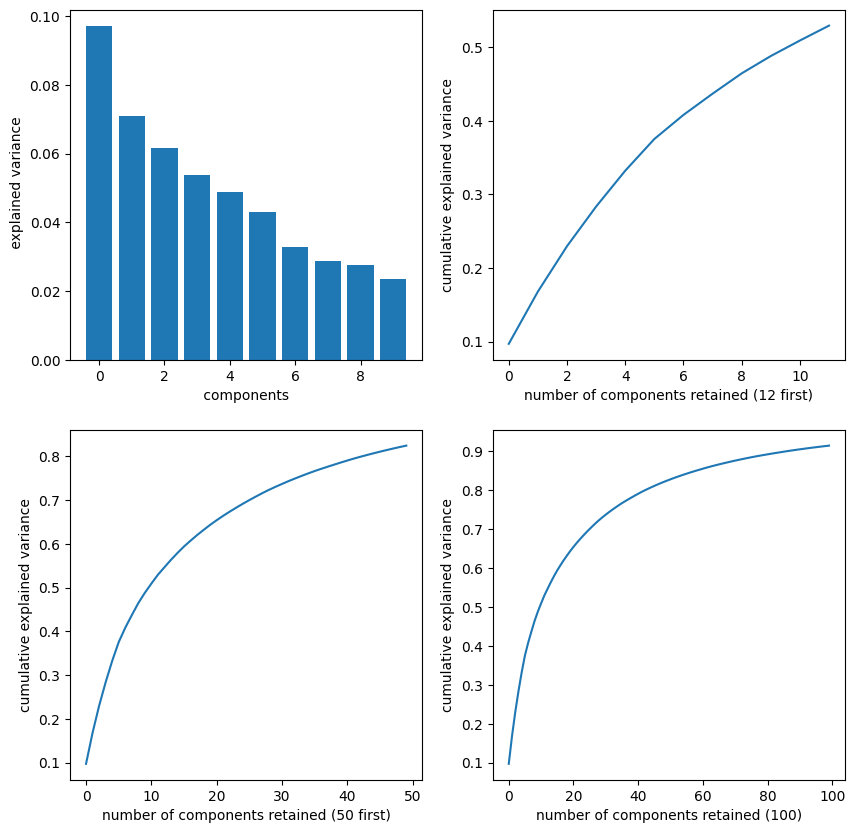

In [81]:
pca = PCA(n_components=100, whiten=True).fit(X_train_normalized)

cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 10))
numOfComp=10
plt.subplot(2, 2, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel(' components ')
plt.ylabel(' explained variance')


plt.subplot(2, 2, 2)
plt.plot(cumExplainedVar[:12])
plt.xlabel('number of components retained (12 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 3)
plt.plot(cumExplainedVar[:50])
plt.xlabel('number of components retained (50 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(2, 2, 4)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (100)')
plt.ylabel('cumulative explained variance')

plt.show()

Παρατηρούμε ότι οι 12 κύριες συνιστώσες εξηγούν το 55% της διακύμανσης, οι 50 κύριες συνιστώσες εξηγούν το 80% της διακύμανσης και οι 100 κύριες εξηγούν περίπου το 90% της διακύμανσης. Θα κάνουμε PCA στο μοντέλο με d=12, d=50 και d=100 ώστε να έχουμε διαφορετικές τιμές διακύμανσης.

In [82]:
'''
    function that returns the train and test data in a tuple after applying PCA transformation to them in a d number of components
'''
def pca_digits(d, X_train, X_test):

    # Initialize the PCA classifier
    pca = PCA(n_components=d, whiten=True)

    # PCA transformation for training data 
    X_train_pca = pca.fit_transform(X_train)

    # PCA transformation for test data
    X_test_pca = pca.transform(X_test)
    
    # We will keep the matrices transposed for training and testing
    return (X_train_pca, X_test_pca)

# function calls    
image_PCA_tuple_12=pca_digits(12, X_train_normalized, X_test_normalized)
image_PCA_tuple_50=pca_digits(50, X_train_normalized, X_test_normalized)
image_PCA_tuple_100=pca_digits(100, X_train_normalized, X_test_normalized)

# variable assignments
X_train_pca_12 = image_PCA_tuple_12[0]
X_test_pca_12 = image_PCA_tuple_12[1]
X_train_pca_50 = image_PCA_tuple_50[0]
X_test_pca_50 = image_PCA_tuple_50[1]
X_train_pca_100 = image_PCA_tuple_100[0]
X_test_pca_100 = image_PCA_tuple_100[1]

Θα εκπαιδέυσουμε με SVM τους πίνακες με d=12 συνιστώσες κρατώντας τις τιμές των υπερπαραμέτρων που βρήκαμε στο προηγούμενο υποερώτημα.

In [83]:
print("training data with d=12 components")
svm_train(X_train_pca_12, y_train, X_test_pca_12, y_test, 'rbf', 4.0, 0.05)

training data with d=12 components
accuracy of training data: 0.9632666666666667
accuracy of test data: 0.9555


Παρατηρούμε ότι η ακρίβεια στα αποτελέσματα ελέγχου έχει πέσει αισθητά σε σύγκριση με τον αρχικό αριθμό χαρακτηριστικών, όμως η διαδικασία ολοκληρώθηκε σε 1.5 λεπτά.

Θα εκπαιδέυσουμε με SVM τους πίνακες με d=50 συνιστώσες.

In [84]:
print("training data with d=50 components")
svm_train(X_train_pca_50, y_train, X_test_pca_50, y_test, 'rbf', 4.0, 0.05)

training data with d=50 components
accuracy of training data: 0.9999666666666667
accuracy of test data: 0.9827


Παρατηρούμε ότι δεν υπάρχει σημαντική μείωση στην ακρίβεια και στα δεδομένα εκπαίδευσης και στα δεδομένα ελέγχου. Η διαδικασία ολοκληρώθηκε σε 7 λεπτά, σημαντική βελτίωση σε σχέση με τα αρχικά πειράματα που έπαιρναν γύρω στα 20 λεπτά και πάνω.

Θα εκπαιδέυσουμε με SVM τους πίνακες με d=100 συνιστώσες.

In [85]:
print("training data with d=100 components")
svm_train(X_train_pca_100, y_train, X_test_pca_100, y_test, 'rbf', 4.0, 0.05)

training data with d=100 components
accuracy of training data: 1.0
accuracy of test data: 0.8495


Παρατηρούμε ότι με 100 συνιστώσες όχι μόνο η διαδικασία διαρκεί πολύ περισσότερο χρόνο (47 λεπτά), αλλά παρατηρείται και έντονο overfitting ως προς τα δεδομένα εκπαίδευσης διότι η ακρίβειά τους είναι τέλεια, ενώ στα δεδομένα ελέγχου έχουμε μόνο 84% ακρίβεια. Αυτό σημαίνει πως για να εξισορροπήσουμε, την ακρίβεια ταξινόμησης, την μείωση διαστάσεων και τον χρόνο εκτέλεσης, χρειάζεται να εφαρμόσουμε PCA στα δεδομένα με 50 κύριες συνιστώσες.

> Τασιούλας Ραφαήλ-Χρήστος sdi1800191